# Lab | Customer Analysis Final Round

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

### 01 - Problem (case study)

Data Description.

- **Unnamed:** Index
- **customer:** Customer ID
- **state:** US State
- **customer_lifetime_value:** CLV is the client economic value for a company during all their relationship
- **response:** Response to marketing calls (customer engagement)
- **coverage:** Customer coverage type
- **education:** Customer education level
- **effective_to_date:** Effective to date
- **employmentstatus:** Customer employment status
- **gender:** Customer gender
- **income:** Customer income
- **location_code:** Customer living zone
- **marital_status:** Customer marital status
- **monthly_premium_auto:** Monthly premium
- **months_since_last_claim:** Last customer claim
- **months_since_policy_inception:** Policy Inception
- **number_of_open_complaints:** Open claims
- **number_of_policies:** Number policies
- **policy_type:** Policy type
- **policy:** Policy
- **renew_offer_type:** Renew
- **sales_channel:** Sales channel (customer-company first contact)
- **total_claim_amount:** Claims amount
- **vehicle_class:** Vehicle class
- **vehicle_size:** Vehicle size
- **vehicle_type:** Vehicle type

**Goal.**  
Can we predict the amount claimed by a client?


### 02 - Getting Data

- Read the `.csv` file.

In [1]:
import pandas as pd                                           # panel data, handling dataframes
pd.set_option('display.max_columns', None)
data=pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')       # import csv file
data.head()                                                    # show first 5 rows

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 03 - Cleaning/Wrangling/EDA

- Change headers names.

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

- Deal with NaN values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

(9134, 23)

- Categorical Features.

Effective To Date

Original dtype: object

Meantime dtype: datetime64[ns]
--
Min date: 2011-01-01 00:00:00
Max date: 2011-02-28 00:00:00
--
New dtype: int64


Values for each class in categorical features

Categorical Features: 14
----------
Name: state
Type: object
Unique values: 5
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: state, dtype: float64

----------
Name: response
Type: object
Unique values: 2
['No' 'Yes']
No     85.679877
Yes    14.320123
Name: response, dtype: float64

----------
Name: coverage
Type: object
Unique values: 3
['Basic' 'Extended' 'Premium']
Basic       60.959054
Extended    30.019707
Premium      9.021239
Name: coverage, dtype: float64

----------
Name: education
Type: object
Unique values: 5
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Bachelor                30.085395
College                 29.351872
High School or Below    28.705934
Master                   8.112547
Doctor                   3.744252
Name: education, dtype: float64

----------
Name: employmentstatus
Type: object
Unique values: 5
['Employe

- Numerical Features.

In [6]:
data.describe()     # stats

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,734166.837749,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,16.942769,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,734138.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,734152.000000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,734166.000000,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,734181.000000,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,734196.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [7]:
num_cols=[c for c in data.columns if (data[c].dtype!='object') and (c!='Effective To Date')]   # numerical columns
num_cols

['customer_lifetime_value',
 'effective_to_date',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

- Exploration.

Bar plot for each categorical variable

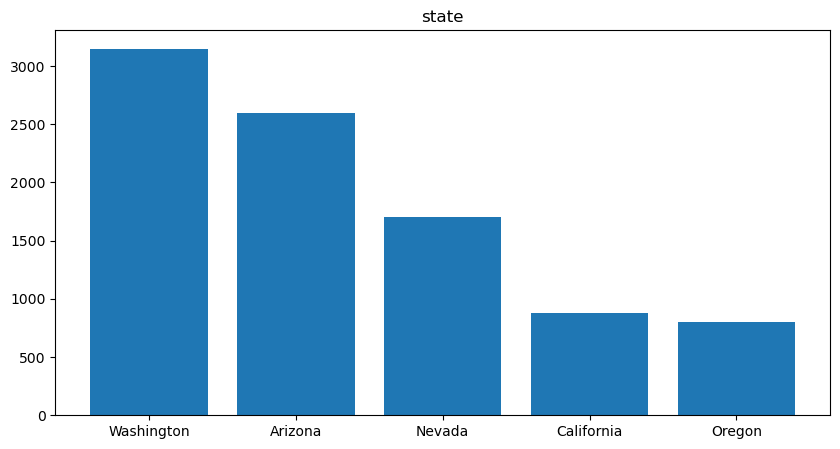

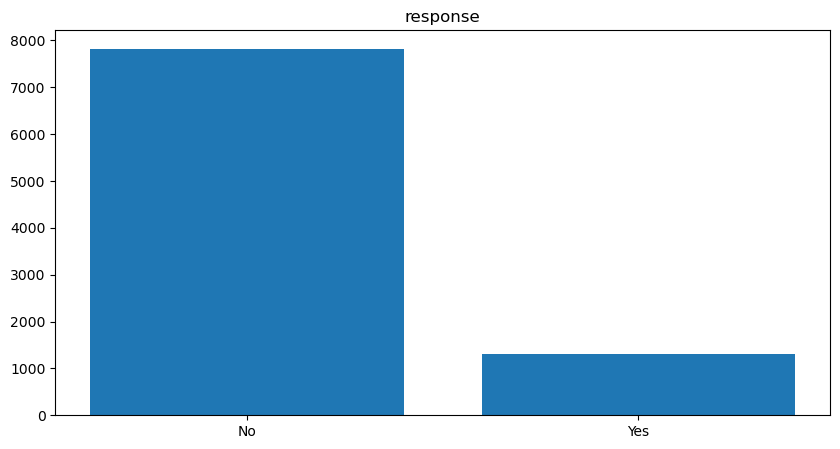

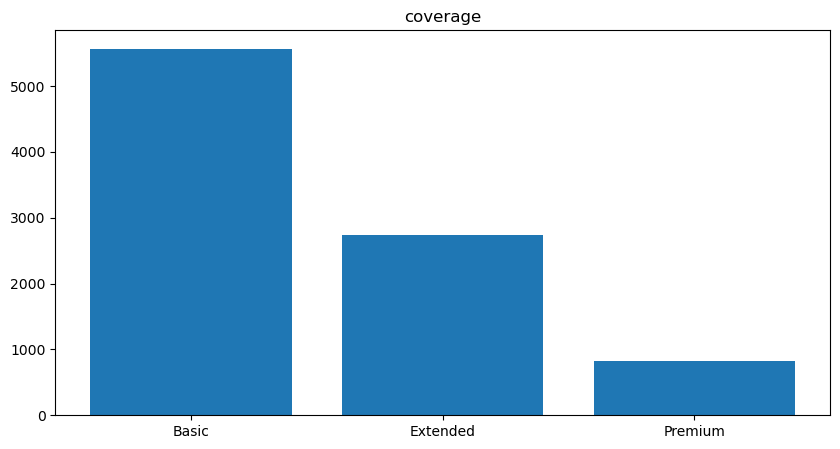

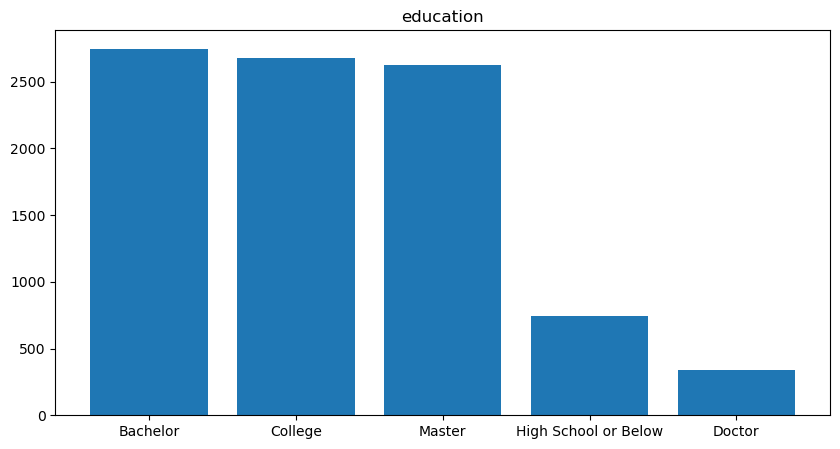

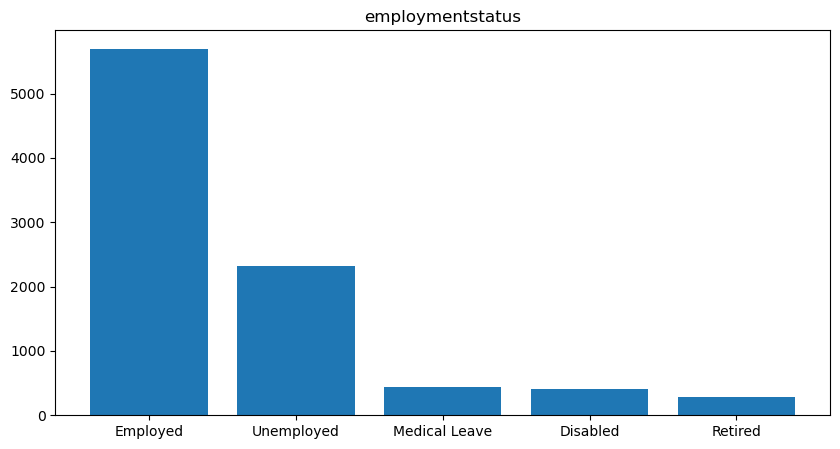

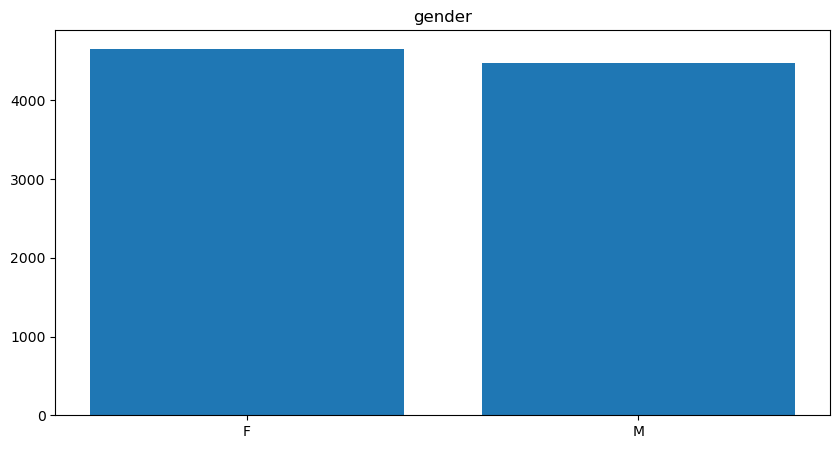

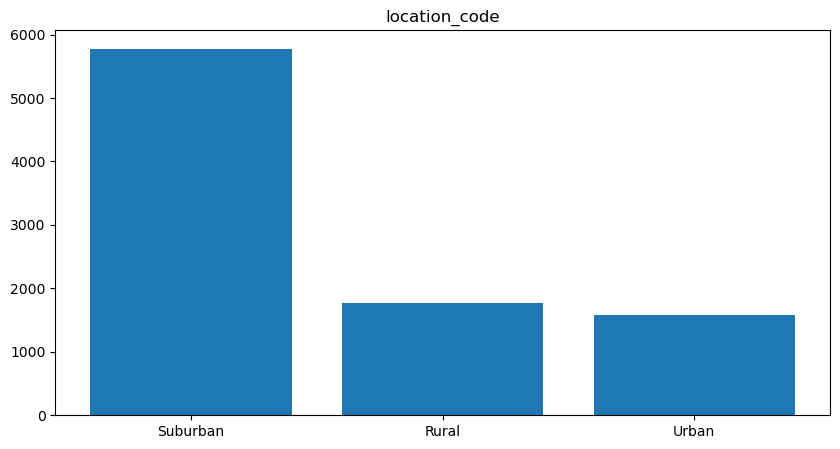

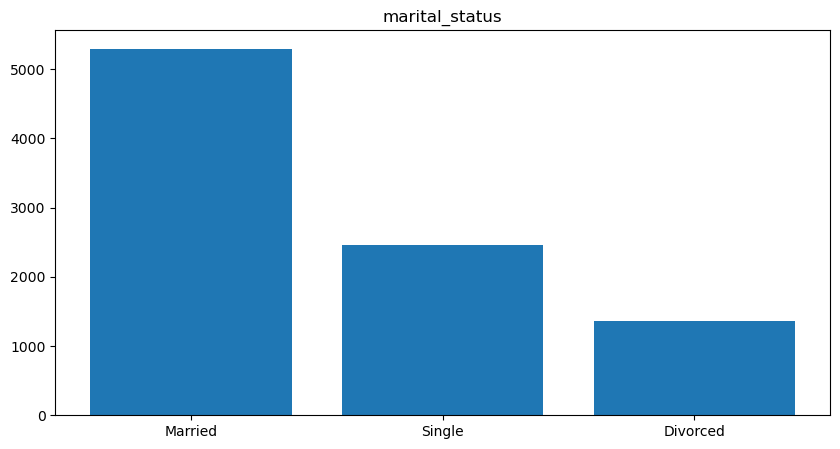

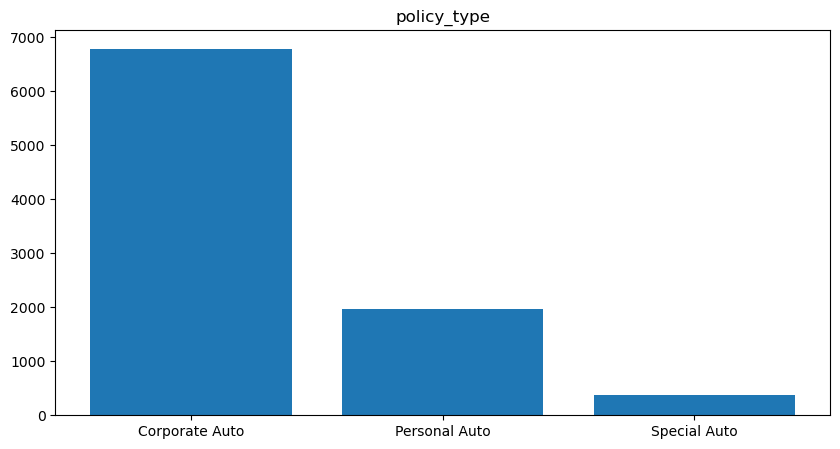

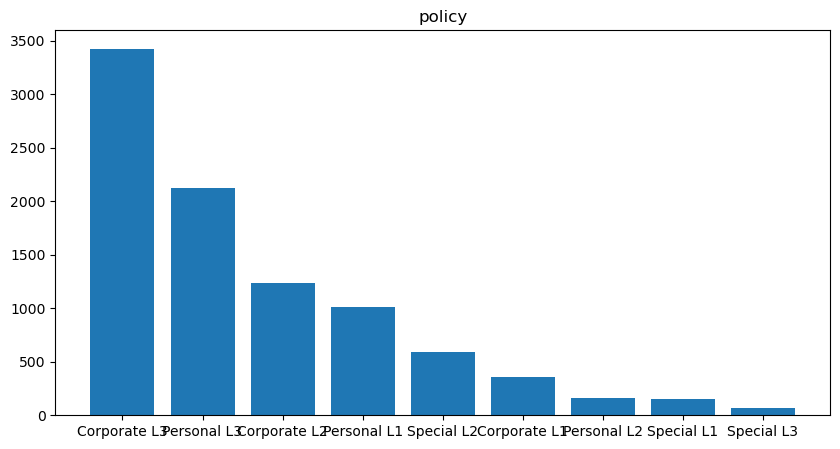

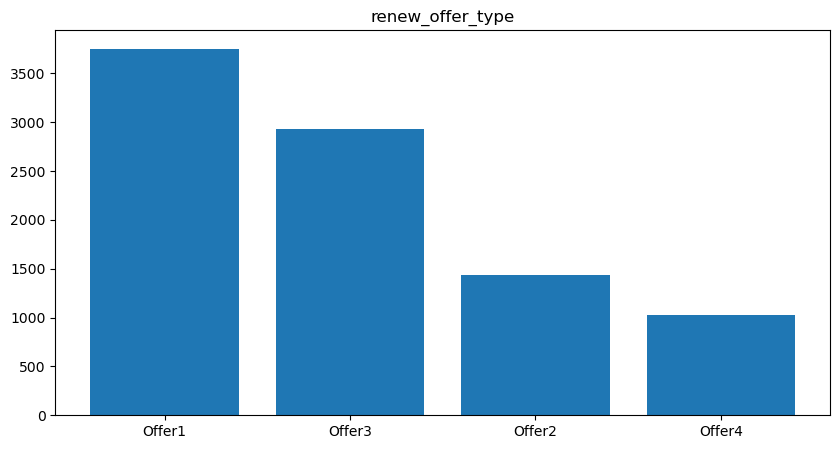

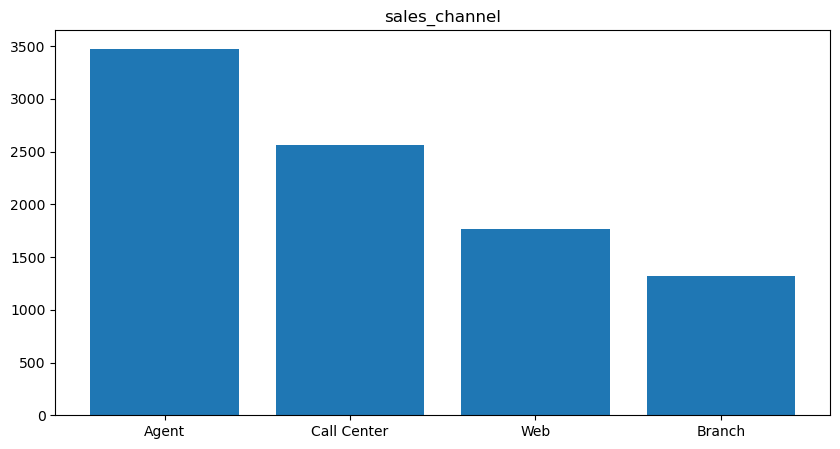

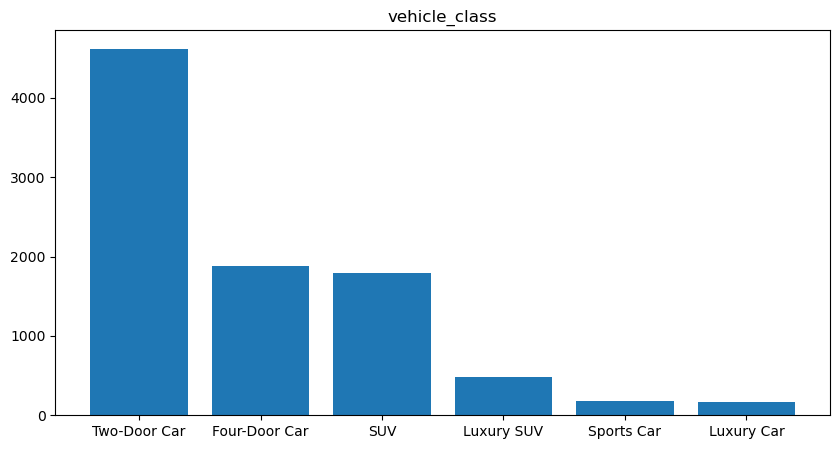

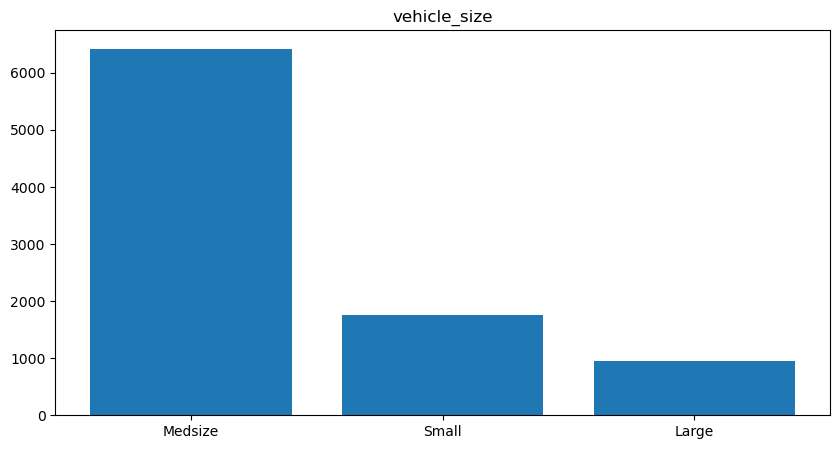

In [8]:
import matplotlib.pyplot as plt                 # visualization library
%matplotlib inline


Correlation

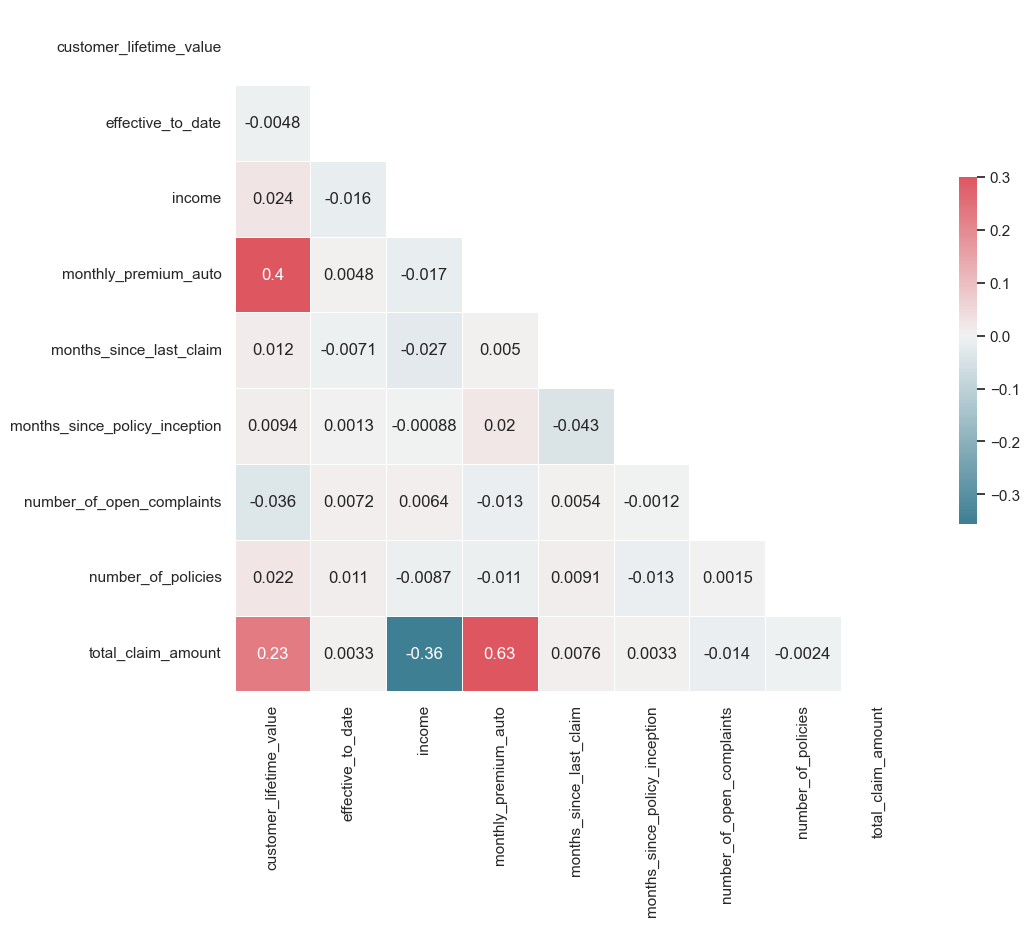

In [9]:
#heatmap

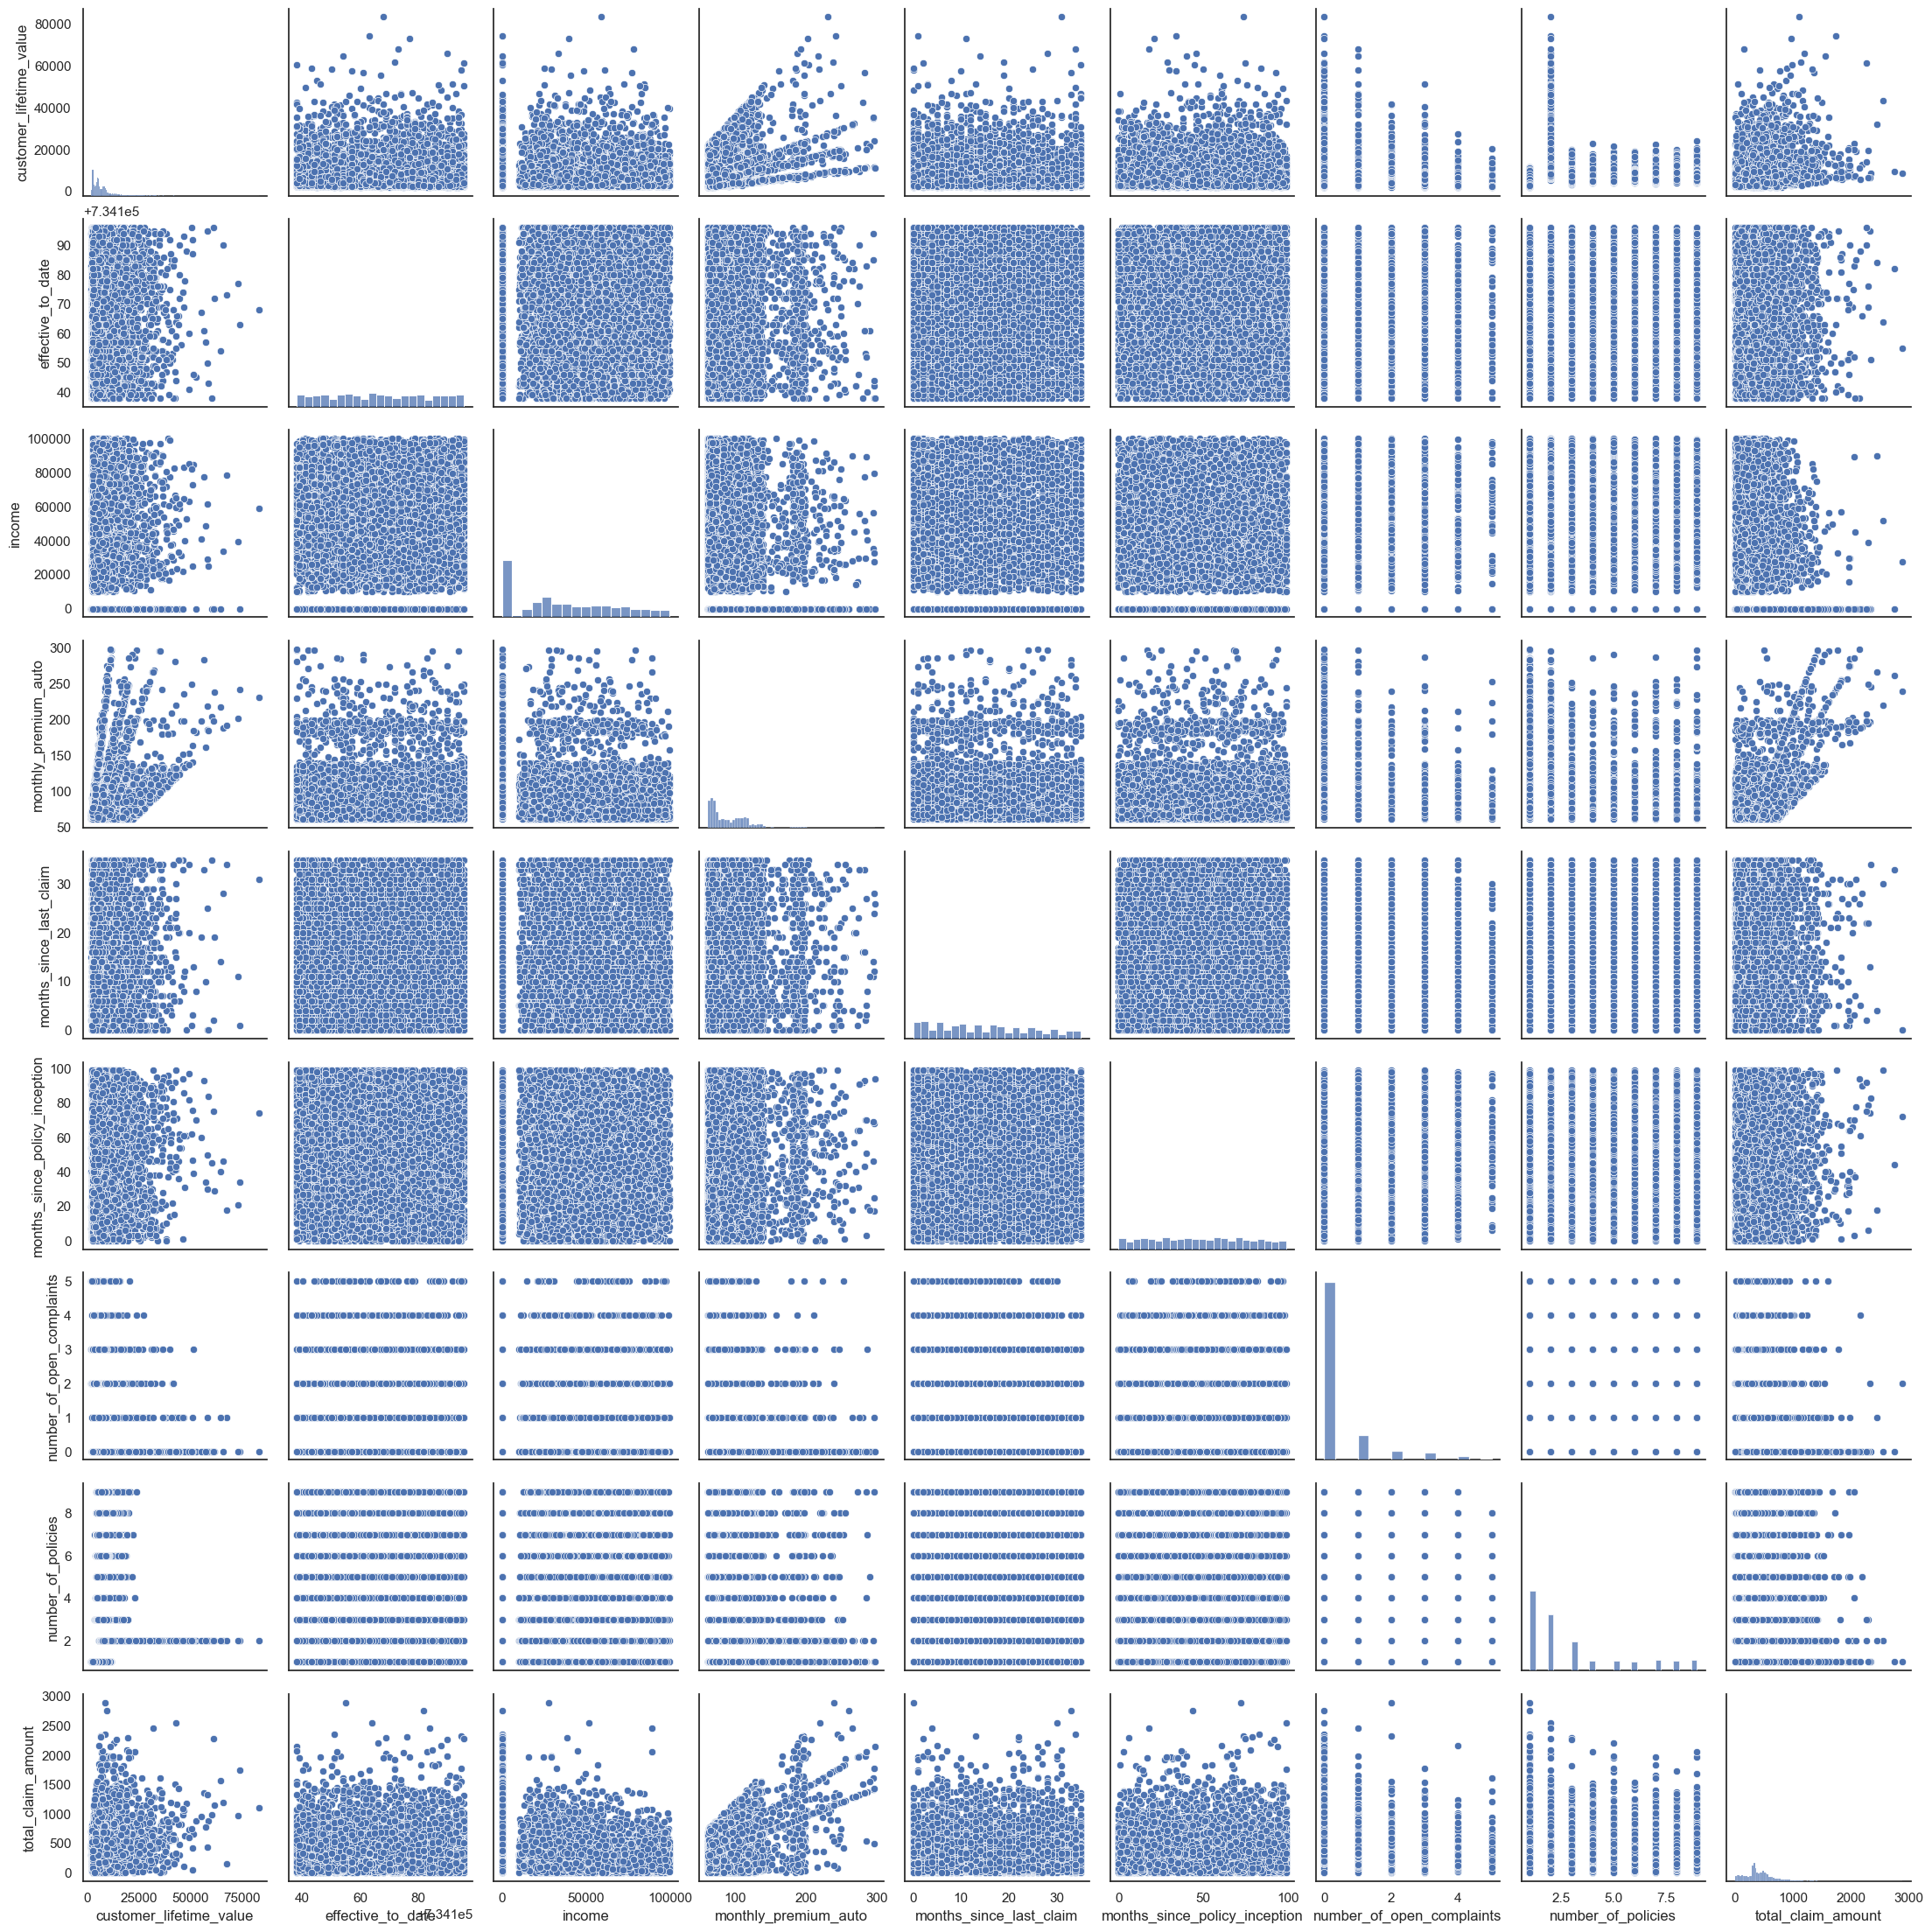

In [10]:
#All variables


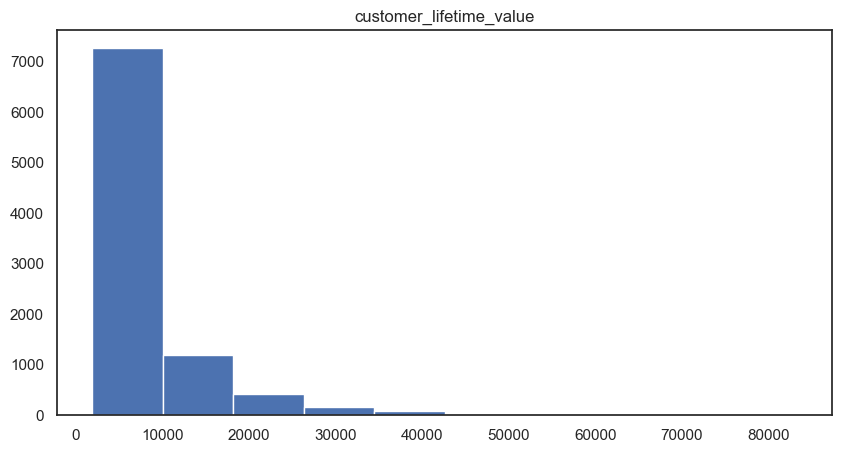

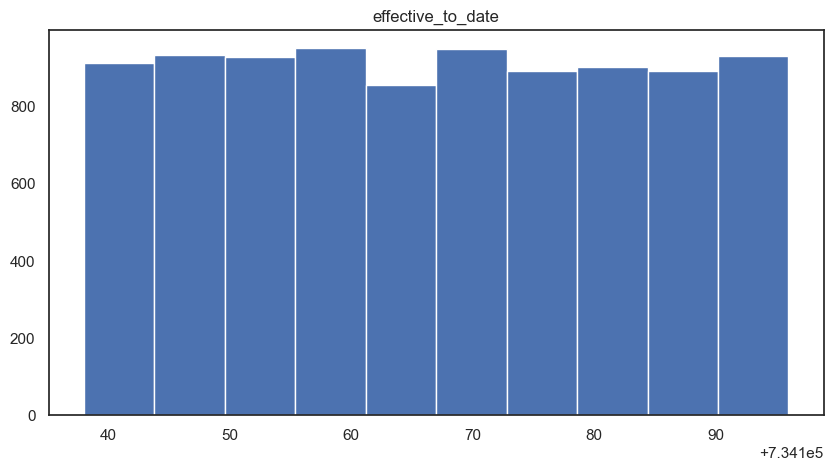

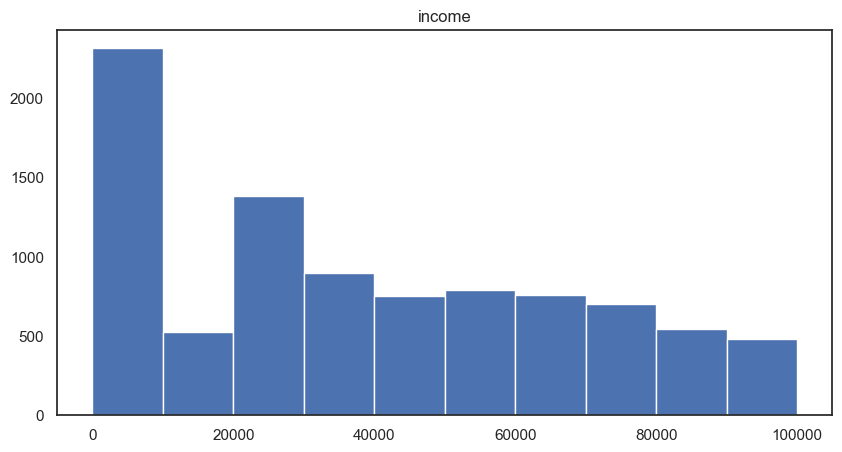

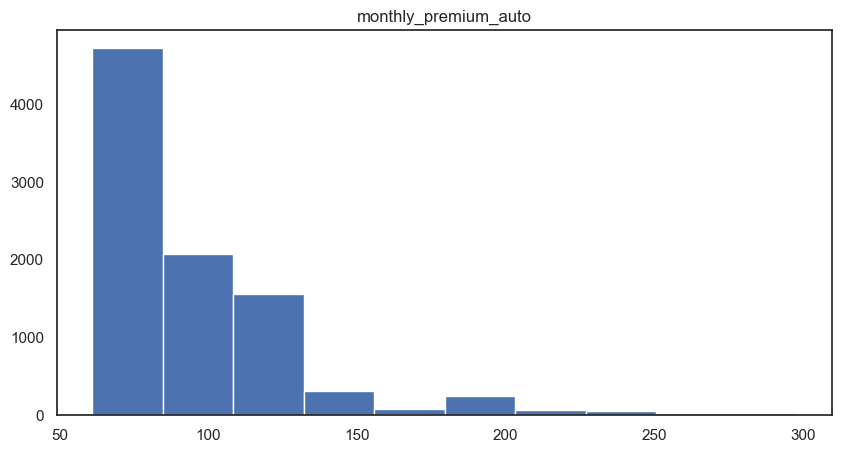

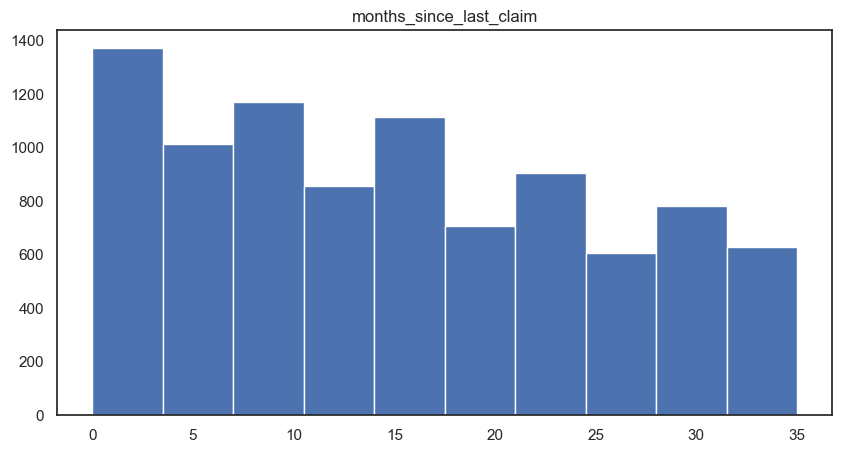

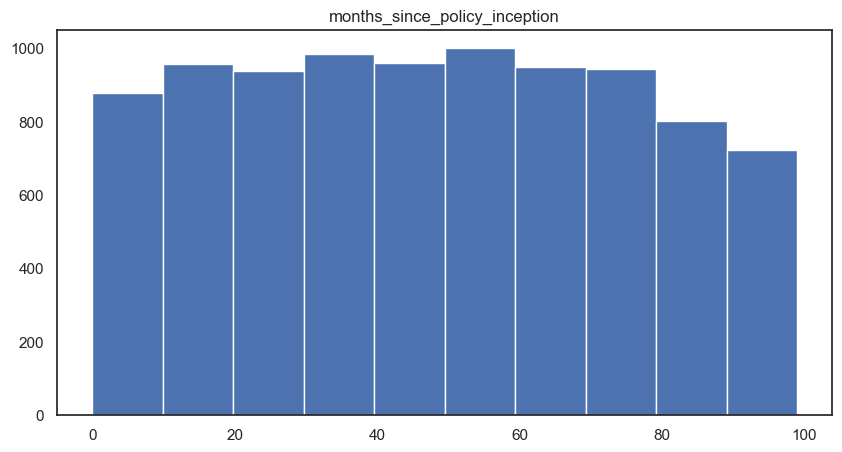

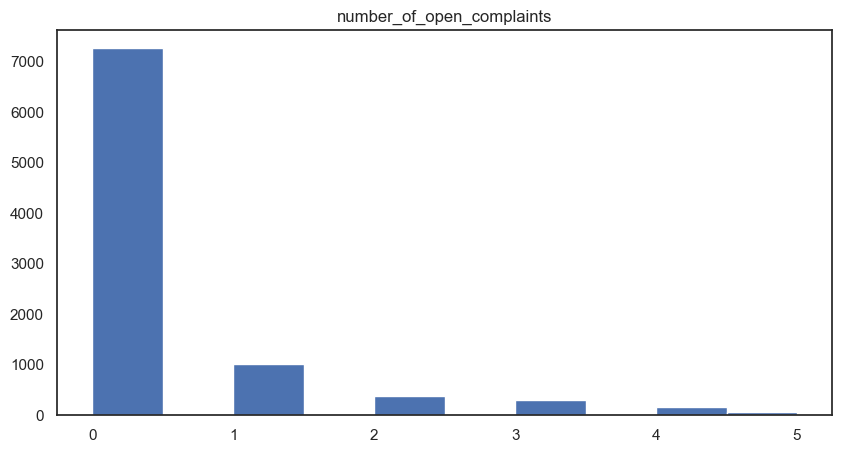

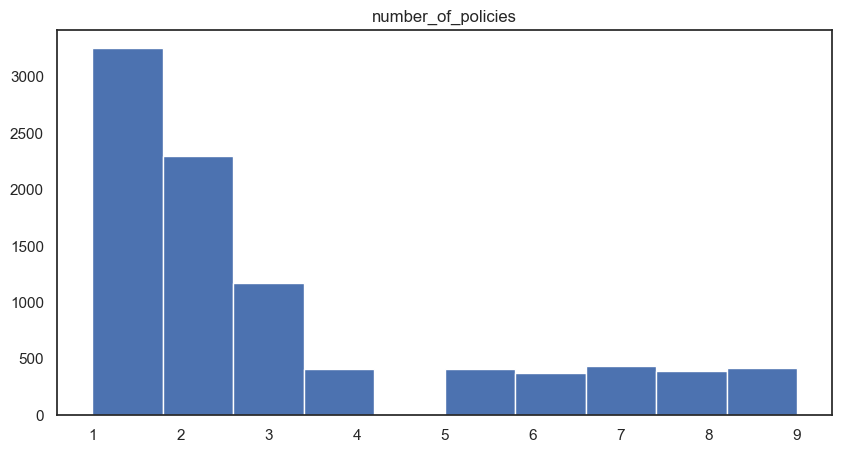

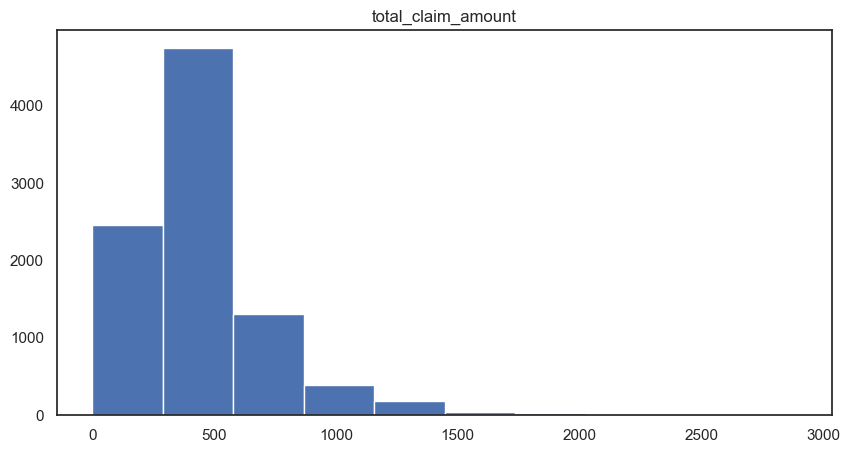

In [11]:
#Bar plot for each numerical variable.


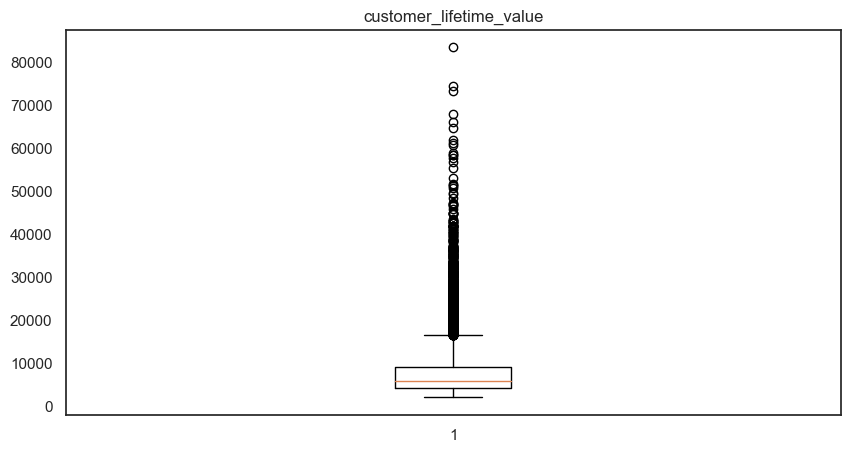

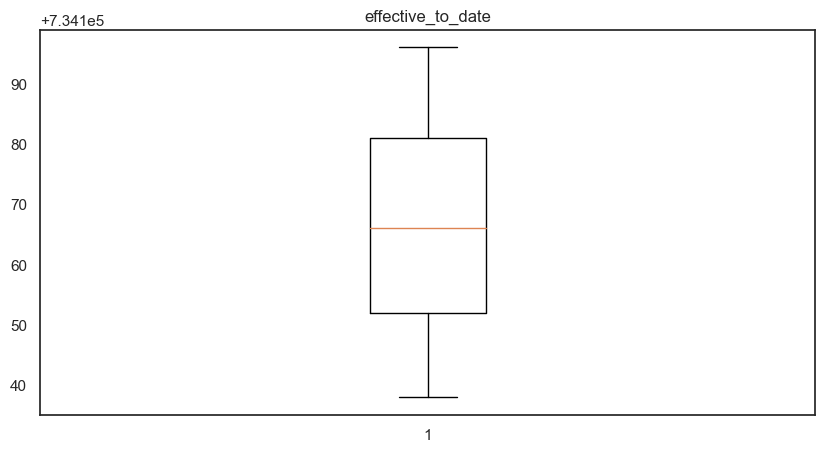

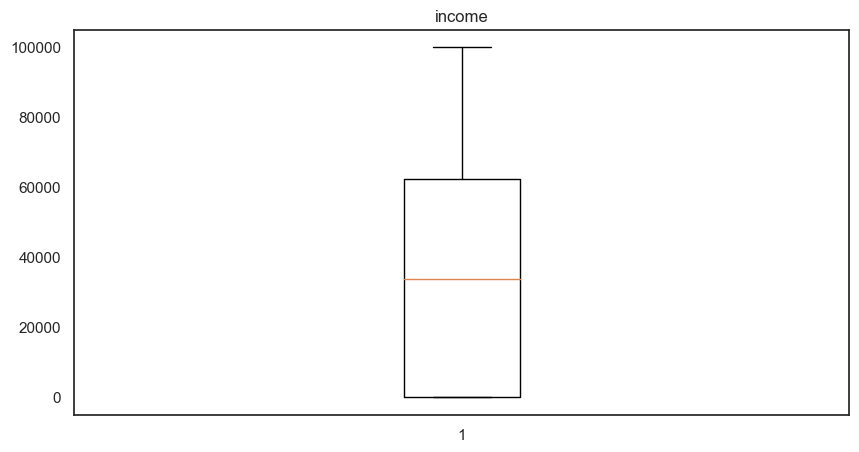

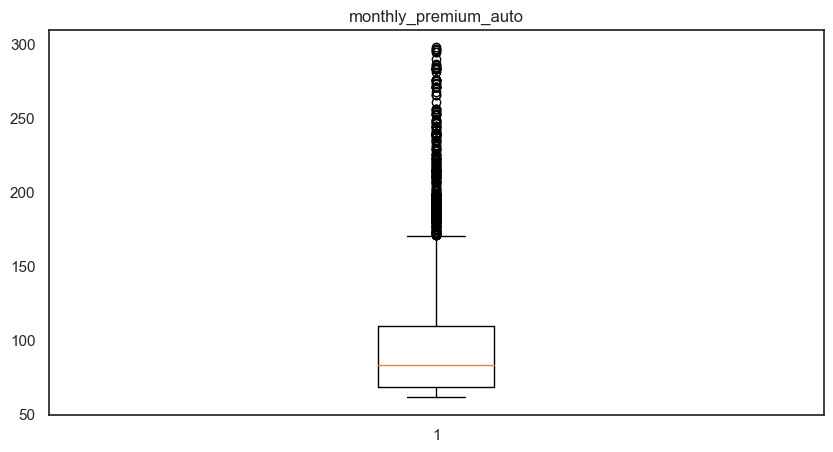

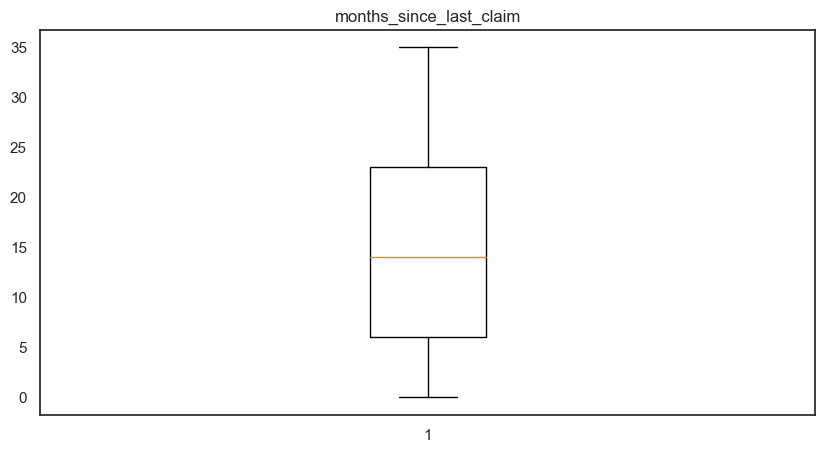

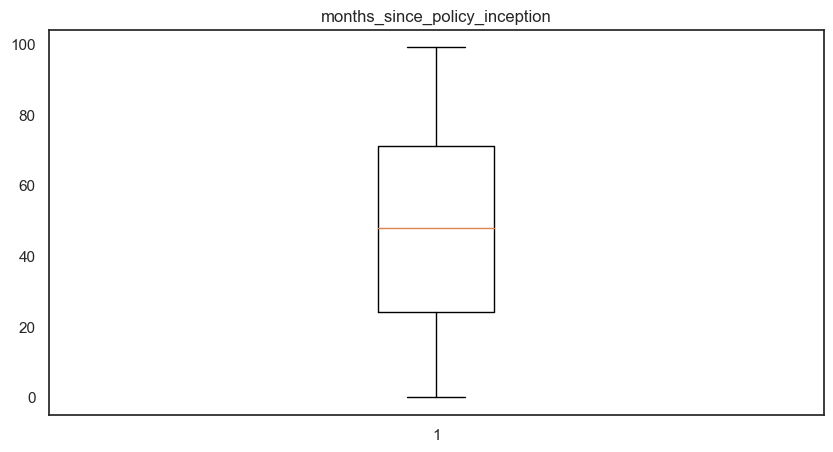

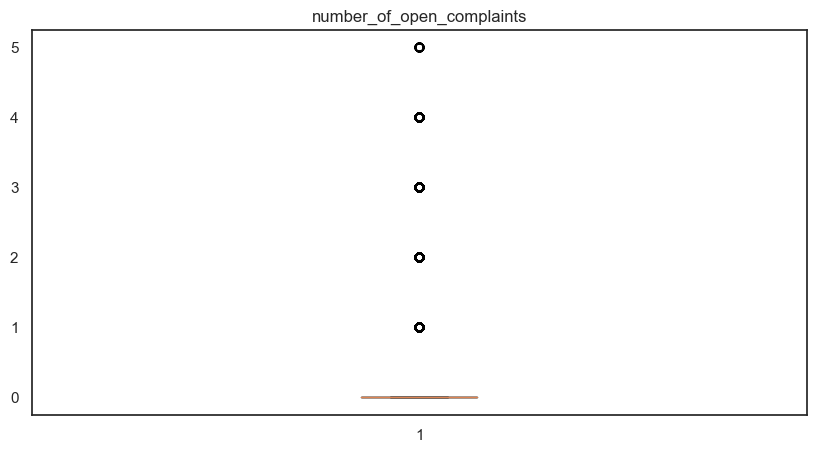

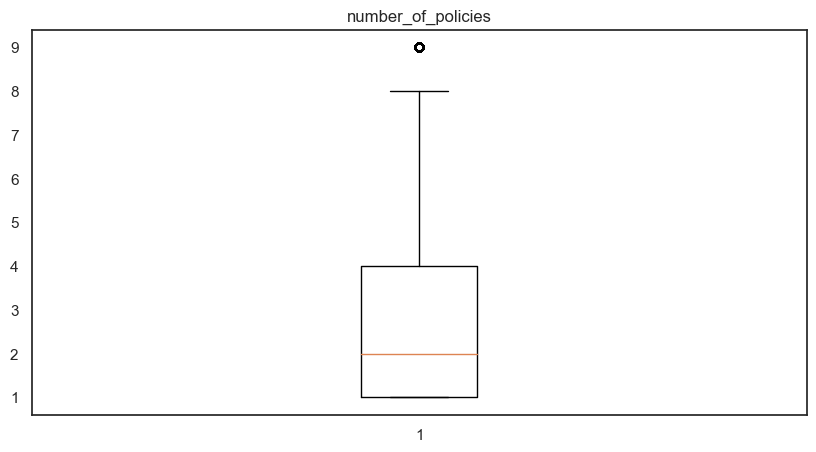

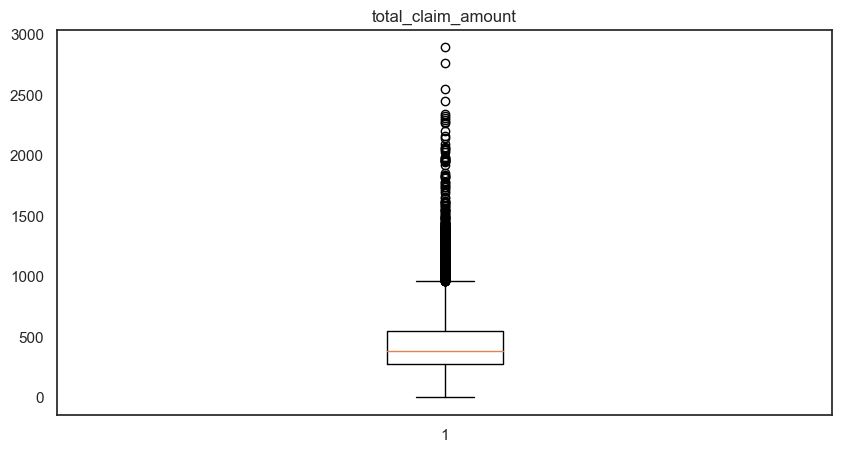

In [12]:
#Box plot for each numerical variable for know outliers of each feature.


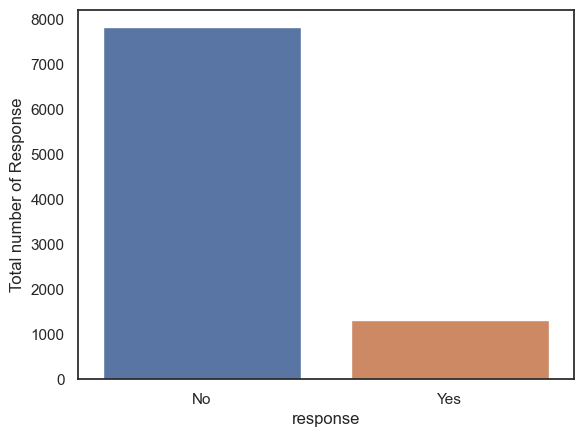

In [13]:
#Show a plot of the total number of response.


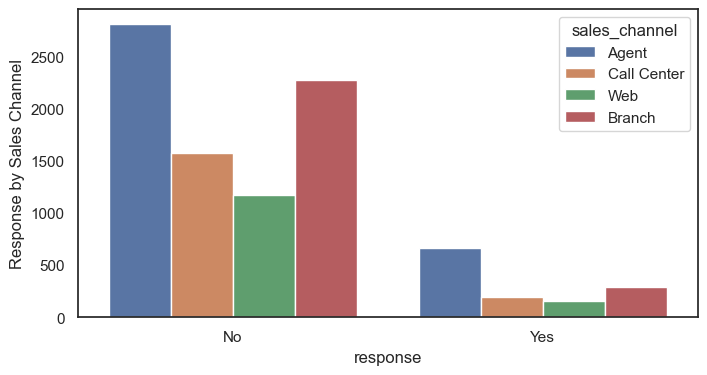

In [14]:
#Show a plot of the response rate by sales channel.



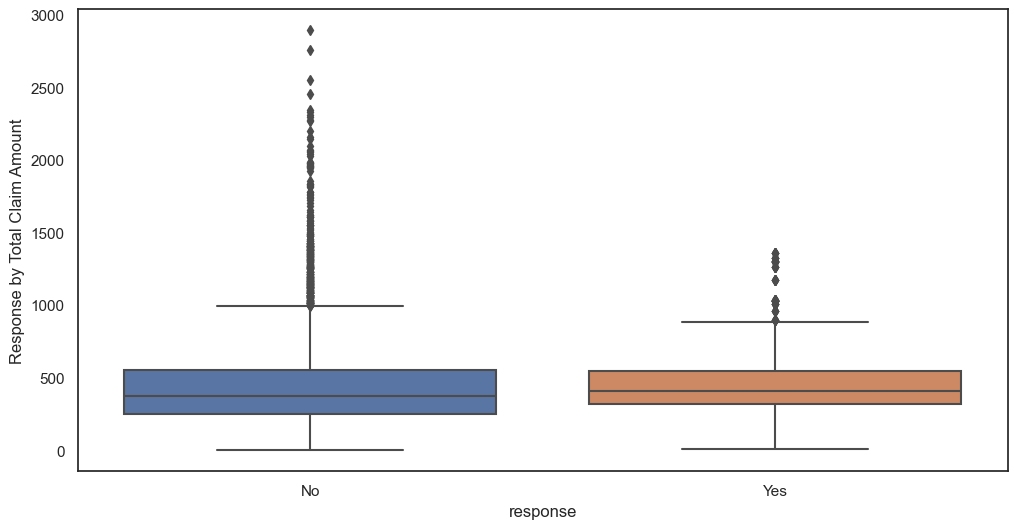

In [15]:
#Show a plot of the response rate by total claim amount.


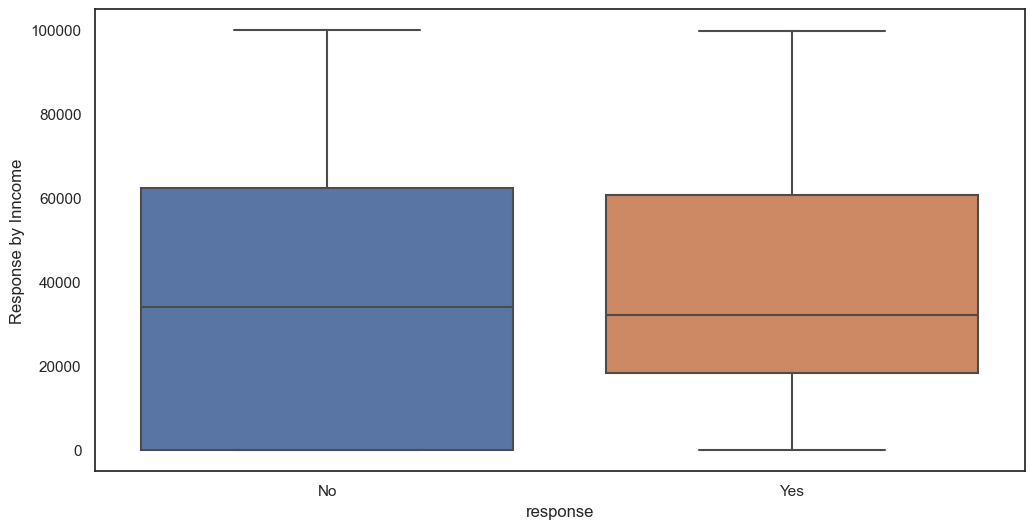

In [16]:
#Show a plot of the response rate by income.



### 04 - Processing Data

- Dealing with outliers.

In [17]:
# e.g. 3*IQR in a column

q1=np.percentile(data['customer_lifetime_value'], 25)   # percentile 25
q3=np.percentile(data['customer_lifetime_value'], 75)   # percentile 75

iqr=q3-q1  # IQR

upper=q3+3*iqr   # upper boundary
lower=q1-3*iqr   # lower boundary

In [18]:
len(data[data['customer_lifetime_value']<lower])

0

In [19]:
len(data[data['customer_lifetime_value']>upper])

367

- Normalization.

In [20]:
#Min-Max Scaler

from sklearn.preprocessing import MinMaxScaler


0    0.931034
1    0.517241
2    0.844828
3    0.327586
4    0.568966
Name: effective_to_date, dtype: float64

In [21]:
#Standardize

from sklearn.preprocessing import StandardScaler



,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,-0.762878,No,Basic,Bachelor,1.485213,Employed,F,0.612827,Suburban,Married,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,-0.149245,No,Extended,Bachelor,0.068602,Unemployed,F,-1.239617,Suburban,Single,0.022691,-0.208186,-0.217334,-0.42225,2.106160,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,0.710636,No,Premium,Bachelor,1.190086,Employed,F,0.365710,Suburban,Married,0.429596,0.288205,-0.360680,-0.42225,-0.404247,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,-0.052263,No,Basic,Bachelor,-0.580678,Unemployed,M,-1.239617,Suburban,Married,0.371467,0.288205,0.606907,-0.42225,1.687759,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,-0.755575,No,Basic,Bachelor,0.245679,Employed,M,0.203390,Rural,Single,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


- Encoding Categorical Data.

In [22]:


one_hot_data.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [23]:
#Concat numerical and categorical DataFrames


,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,-0.762878,1.485213,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,384.811147,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,-0.149245,0.068602,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,1131.464935,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0.710636,1.190086,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,566.472247,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,-0.052263,-0.580678,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,529.881344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,-0.755575,0.245679,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,138.130879,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


- Splitting into train set and test set.

In [24]:
# first, split X-y (learning-target data)

# checking shape
print(X.shape)
print(y.shape)

(9134, 51)
(9134,)


In [25]:
# train_test_split
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test=tts(X, y, test_size=0.2, random_state=42)

### 05 - Modeling

- We have now the data prepared for the regression problem.


- Apply model.

In [26]:
# Linear Regression

from sklearn.linear_model import LinearRegression as LinReg
linreg=LinReg()    # model
linreg.fit(X_train, y_train)   # model train
y_pred_linreg=linreg.predict(X_test)   # model prediction

### 06 - Model Validation

In [34]:
#Our model is linreg
#Our predictions are y_pred_linreg

- R2.

In [39]:
train_score=linreg.score(X_train, y_train) #R2
test_score=linreg.score(X_test, y_test)
print (train_score, test_score)

0.7743071533051843 0.7626410023961917


- MSE.

In [41]:
from sklearn.metrics import mean_squared_error as mse

train_mse=mse(linreg.predict(X_train), y_train) #MSE
test_mse=mse(y_pred_linreg, y_test)

print (train_mse, test_mse)

19308.39422399765 18872.6609352573


- RMSE.

In [42]:
train_rmse=mse(linreg.predict(X_train), y_train)**0.5 #RMSE
test_rmse=mse(y_pred_linreg, y_test)**0.5

print (train_rmse, test_rmse)

138.95464808345798 137.3778036483962


- MAE.

In [43]:
from sklearn.metrics import mean_absolute_error as mae
train_mae=mae(linreg.predict(X_train), y_train) #MAE
test_mae=mae(y_pred_linreg, y_test)

print (train_mae, test_mae)

95.20813765725708 94.54575948996772


### 07 - Reporting

- Present results.